In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy

In [2]:
def metropolis_hasting(p, q, q_sample, N):
    X = np.zeros(N)
    x = np.random.rand()
    for i in range(N):
        y = q_sample(x)
        r = p(y) * q(x, y) / (p(x) * q(y, x))
        A = min(1, r)
        if np.random.rand() < A:
            X[i] = y
            x = y
        else:
            X[i] = x
    return X

In [3]:
def exp_pdf(x, _lambda):
    return _lambda * np.exp(-_lambda * x) * (x >= 0)

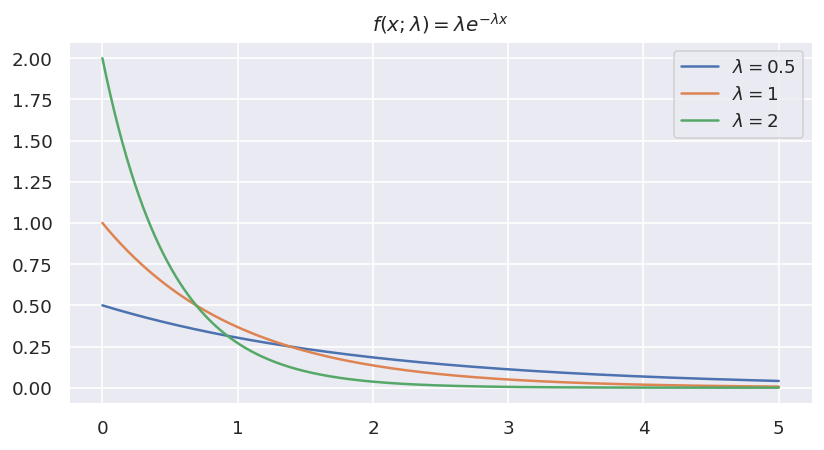

In [4]:
_lambdas = [0.5, 1, 2]

fig = plt.figure(figsize=(8, 4), dpi=120)
x = np.linspace(start=0, stop=5, num=1000)
for _lambda in _lambdas:
    f = exp_pdf(x, _lambda)
    plt.plot(x, f, label=f'$\lambda = {_lambda}$')
plt.title('$f(x; \lambda) = \lambda e^{-\lambda x}$')
plt.legend()
plt.show()

In [5]:
def normal_pdf(x, mu, sigma):
    return scipy.stats.norm.pdf(x, mu, sigma)

def normal_sample(mu, sigma):
    return np.random.randn() * sigma + mu

In [6]:
_lambda = 2.0
N = 5000

p = lambda x: exp_pdf(x, _lambda)
q = lambda x, y: normal_pdf(x, mu=y, sigma=0.1)
q_sample = lambda x: normal_sample(mu=x, sigma=0.1)

X = metropolis_hasting(p, q, q_sample, N)

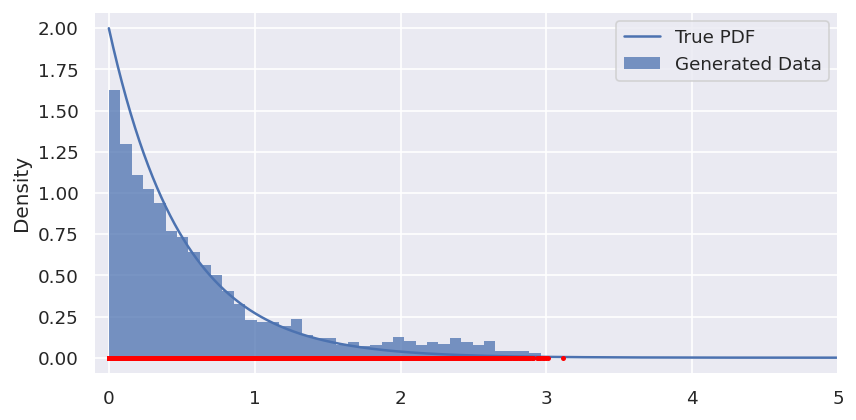

In [7]:
fig = plt.figure(figsize=(8, 4), dpi=120)

# Generated data
sns.histplot(X, 
             stat='density', 
             label='Generated Data',
             linewidth = 0)
sns.scatterplot(x=X, y=np.zeros(N),
                marker='.', color='red', linewidth = 0,
                zorder=5)

# True PDF f(x)
x = np.linspace(start=0, stop=5, num=1000)
f = exp_pdf(x, _lambda)
sns.lineplot(x=x, y=f, label='True PDF')

plt.legend()
plt.xlim(-0.1, 5)
plt.ylim(-0.1, 2.1)
plt.show()